### Prophet exercise

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from prophet import Prophet

In [2]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [3]:
wmt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400


* use only the `Date` and `Adj Close` columns

In [4]:
# prepare expected column names date as 'ds', close as 'y'
wmt = wmt.rename(columns={'Date': 'ds', 'Close': 'y'})
wmt.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400


* rename columns to fit the Prophet naming convention

* convert date to datetime

In [5]:
# convert ds column to datetime
wmt['ds'] = pd.to_datetime(wmt['ds'])
wmt.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400


* plot time-series

<Axes: xlabel='ds'>

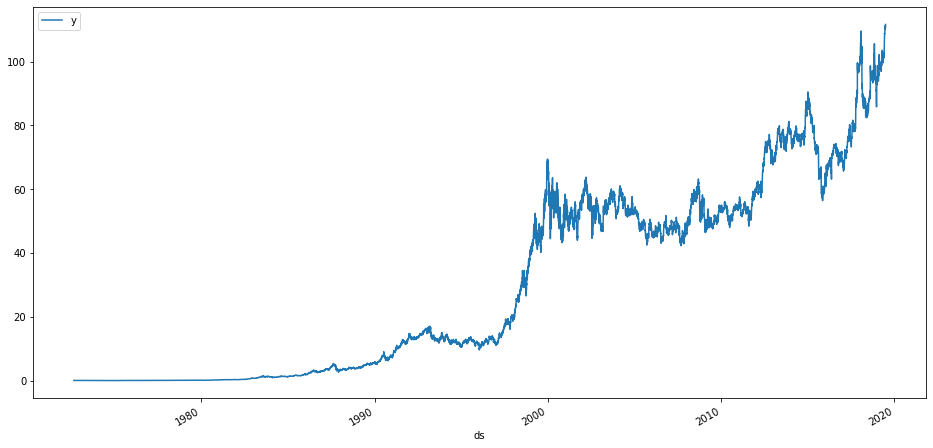

In [6]:
# plot time series
wmt.plot(x='ds', y='y', figsize=(16,8))

In [7]:
# select only the important features i.e. date and price

df = wmt[['ds','y']]
df.head()

,ds,y
0,1972-08-25,0.064453
1,1972-08-28,0.064209
2,1972-08-29,0.063477
3,1972-08-30,0.063477
4,1972-08-31,0.062500


* instantiate Prophet

In [8]:
model = Prophet()

* fit model

In [9]:
model.fit(df)

21:03:32 - cmdstanpy - INFO - Chain [1] start processing
21:03:35 - cmdstanpy - INFO - Chain [1] done processing


* forecast 365 values into the future 

In [10]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
12175,2020-06-27
12176,2020-06-28
12177,2020-06-29
12178,2020-06-30
12179,2020-07-01


* plot forecast

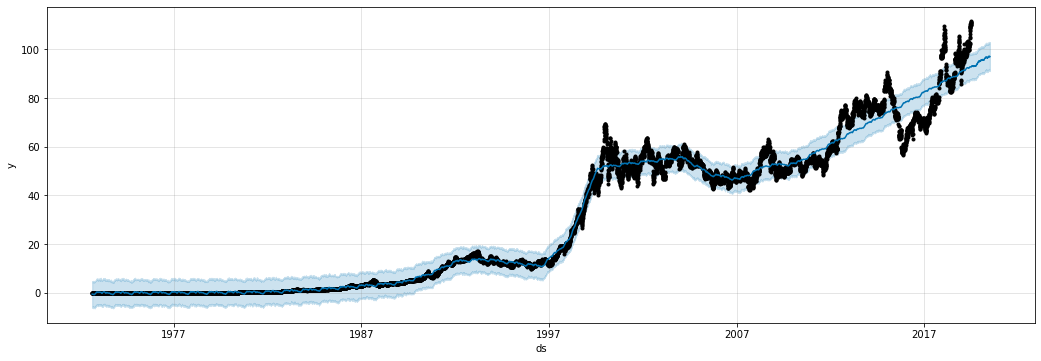

In [11]:
# plot forecast
forecast = model.predict(future)
fig1 = model.plot(forecast)
fig1.set_size_inches((15, 5))
plt.show()

* plot components

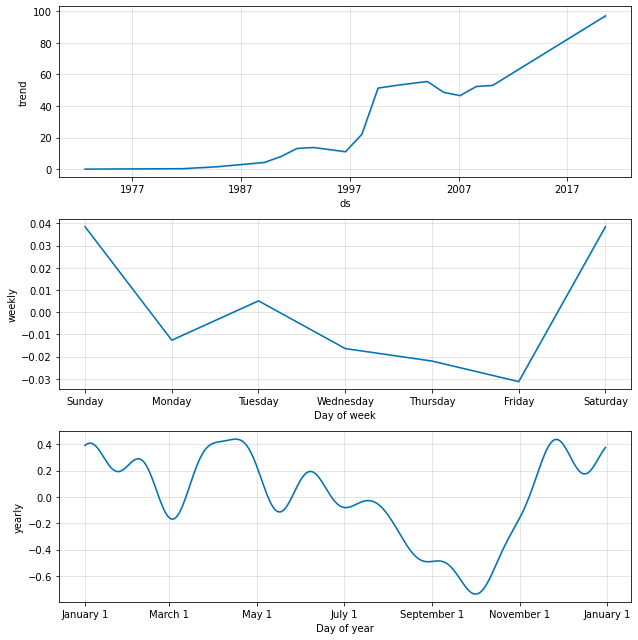

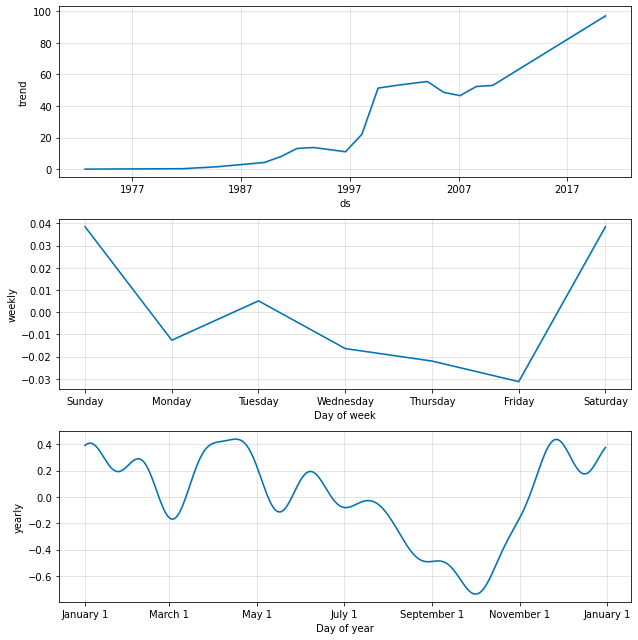

In [12]:
model.plot_components(forecast)

## Stretch
### Arima vs. Prophet Modeling

- Build the separate ARIMA model and compare with existing Prophet prediction. Use the last 7 values we have in the timeseries to test which approach has better predictions.

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [14]:
series = df

In [15]:
# create panda series with ds as index
series = pd.Series(df['y'].values, index=df['ds'])

In [16]:
series

ds
1972-08-25      0.064453
1972-08-28      0.064209
1972-08-29      0.063477
1972-08-30      0.063477
1972-08-31      0.062500
                 ...    
2019-06-26    110.160004
2019-06-27    110.099998
2019-06-28    110.489998
2019-07-01    110.620003
2019-07-02    111.599998
Length: 11815, dtype: float64

In [17]:
from matplotlib import pyplot

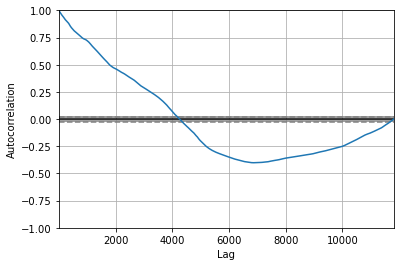

In [18]:
# check for lag
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
pyplot.show()

The parameters of the ARIMA model are defined as follows:

`p:` The number of lag observations included in the model, also called the lag order.\
`d:` The number of times that the raw observations are differenced, also called the degree of differencing.\
`q:` The size of the moving average window, also called the order of moving average.

In [19]:
# fid degree of differencing d
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# ADF Test
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

    

ADF Statistic: 0.998914
p-value: 0.994254
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


`Dataset is not stationary`

In [20]:
series.index

DatetimeIndex(['1972-08-25', '1972-08-28', '1972-08-29', '1972-08-30',
               '1972-08-31', '1972-09-01', '1972-09-05', '1972-09-06',
               '1972-09-07', '1972-09-08',
               ...
               '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-07-01', '2019-07-02'],
              dtype='datetime64[ns]', name='ds', length=11815, freq=None)

/Users/patrickokwir/miniconda/envs/DeepLearning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/patrickokwir/miniconda/envs/DeepLearning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/patrickokwir/miniconda/envs/DeepLearning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                11815
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -11029.200
Date:                Fri, 02 Jun 2023   AIC                          22070.400
Time:                        21:03:39   BIC                          22114.662
Sample:                             0   HQIC                         22085.259
                              - 11815                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0344      0.004     -7.898      0.000      -0.043      -0.026
ar.L2         -0.0581      0.005    -12.325      0.000      -0.067      -0.049
ar.L3         -0.0213      0.005     -4.374      0.0

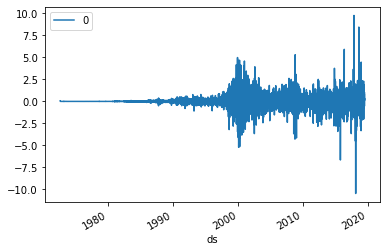

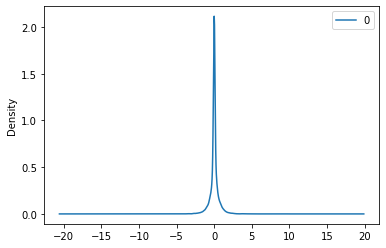

                  0
count  11815.000000
mean       0.011086
std        0.615371
min      -10.469293
25%       -0.092893
50%        0.000191
75%        0.120487
max        9.771317


In [21]:
# Lag is about 4000

#series.index = series.to_timestamp(ds)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predicted=53.301053, expected=53.080002
predicted=53.034719, expected=52.900002
predicted=53.029742, expected=53.560001
predicted=53.511884, expected=54.060001
predicted=54.010355, expected=53.470001
predicted=53.421763, expected=53.490002
predicted=53.500297, expected=53.830002
predicted=53.803632, expected=53.619999
predicted=53.592657, expected=53.919998
predicted=53.889344, expected=54.150002
predicted=54.094565, expected=54.070000
predicted=54.094337, expected=53.900002
predicted=53.904087, expected=53.590000
predicted=53.559451, expected=53.660000
predicted=53.692540, expected=53.959999
predicted=53.948598, expected=54.139999
predicted=54.114299, expected=54.150002
predicted=54.157833, expected=54.060001
predicted=54.061621, expected=53.630001
predicted=53.643500, expected=53.970001
predicted=53.966563, expected=53.900002
predicted=53.865490, expected=55.419998
predicted=55.373279, expected=55.990002
predicted=55.877455, expected=55.919998
predicted=55.820219, expected=55.939999


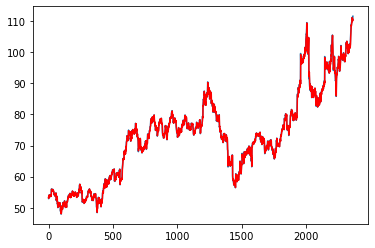

In [23]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 
 model = ARIMA(history, order=(10,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

** (Stretch) LSTMs**
---

In [24]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [25]:
df.head()

,ds,y
0,1972-08-25,0.064453
1,1972-08-28,0.064209
2,1972-08-29,0.063477
3,1972-08-30,0.063477
4,1972-08-31,0.062500


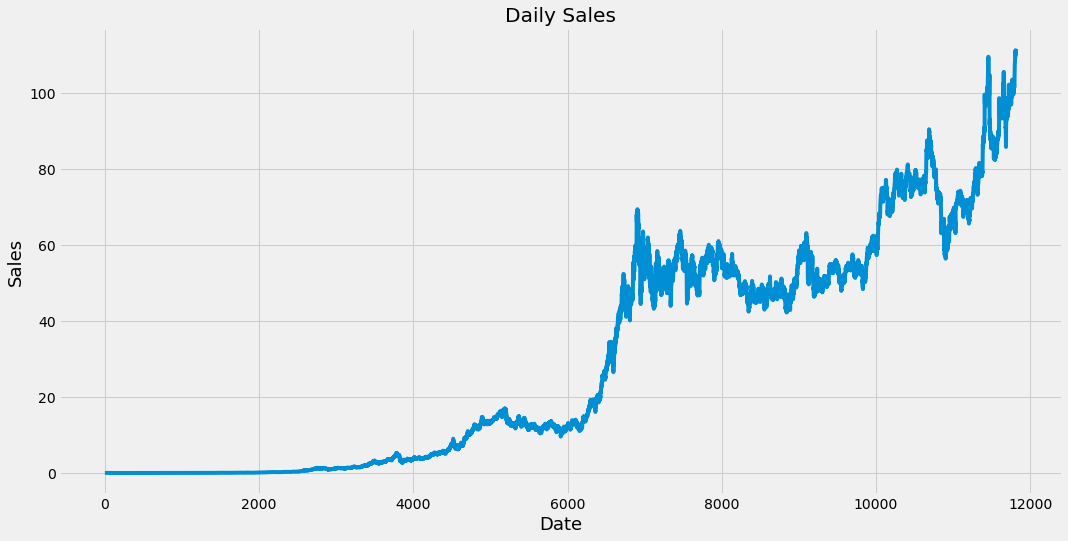

In [27]:
plt.figure(figsize=(16,8))
plt.title('Daily Sales')
plt.plot(df['y'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Sales',fontsize=18)
plt.show()

In [28]:
import math

In [29]:
numDays = 30

In [30]:
data = df.filter(['y'])
training_data_len = math.ceil(len(data) * .8)
train_data = data.iloc[0:training_data_len,:]
test_data = data.iloc[training_data_len - numDays:,:]

In [31]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_data = scaler.fit_transform(train_data)

In [32]:
x_train =[]
y_train=[]


for i in range(numDays,len(scaled_train_data) -1):
  x_train.append(scaled_train_data[i-numDays:i, 0])
  y_train.append(scaled_train_data[i + 1,0])

In [33]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
x_train.shape

(9421, 30)

In [34]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(9421, 30, 1)

In [35]:
# build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                         

In [36]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
#train the model
model.fit(x_train,y_train,batch_size=7,epochs=20)

Epoch 1/20


2023-06-02 22:01:46.297020: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1346/1346 [==============================] - 34s 23ms/step - loss: 8.1505e-04
Epoch 2/20
1346/1346 [==============================] - 30s 23ms/step - loss: 4.1154e-04
Epoch 3/20
1346/1346 [==============================] - 31s 23ms/step - loss: 3.3289e-04
Epoch 4/20
1346/1346 [==============================] - 31s 23ms/step - loss: 2.7338e-04
Epoch 5/20
1346/1346 [==============================] - 30s 22ms/step - loss: 2.6229e-04
Epoch 6/20
1346/1346 [==============================] - 30s 22ms/step - loss: 2.4292e-04
Epoch 7/20
1346/1346 [==============================] - 30s 23ms/step - loss: 2.3358e-04
Epoch 8/20
1346/1346 [==============================] - 30s 23ms/step - loss: 2.2292e-04
Epoch 9/20
1346/1346 [==============================] - 30s 22ms/step - loss: 2.0693e-04
Epoch 10/20
1346/1346 [==============================] - 30s 23ms/step - loss: 1.9417e-04
Epoch 11/20
1346/1346 [==============================] - 31s 23ms/step - loss: 1.9302e-04
Epoch 12/20
1346/1346 [=======